### Definitions:
* **Tokens:** words, syllables, punctuation... Basic units of speech.
* **Characters**: letters, numbers, spaces, punctuations, tabs...
    * Models will be built on tokens/words or characters.
* **Vocabulary**: the set of all words that I consider in the model. The X most common words (10K/100K or whatever number)
* **Corpus:** The set of all our texts. Here it's the dataset.
* **N-gram:** a set of N consecutive items (tokens/words, subwords, characters...). They are particularized as unigrams, bigrams, trigrams...
* **Vectors:** We can represent a word by the position in the vocabulary ("Cipote" = 41564) or by a vector in a vector space of dimension n ("Cipote" = [0.1, 0.324, .004, ..., 0.34])

This is how a count vectorizer would look like:

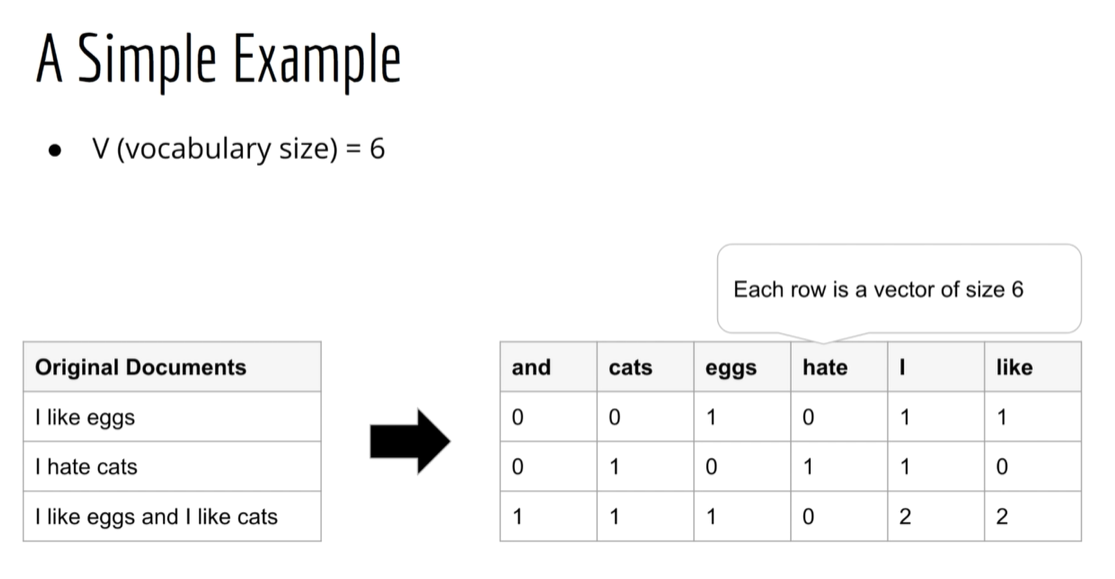

## Count vectorizer
* For each document, count how many times the words appear. Use only the train set! --> This produces a sparse matrix.
* Needs a mapping from word to index.

### Normalization:
* Some words are very common and some very rare. There won't be negative values.
* Two options typically L1 norm or L2 norm.

1.   $$ x_i = \frac{x_i}{\sqrt(\sum(x^2)} $$
2.   $$ x_i = \frac{x_i}{\sum(x)} $$




### Tokenization = Splitting strings into words
* Split by white space or something else. Then count each word.
* I can include punctuation or not. Up to the application. cats vs. cats? Will be treated differently, which requires more data.
* Same thing with upper/lower case. Cats vs. cats. Normally I will put everything in lowercase.
* Accents. España vs. Espana. À plus vs. A plus. Decide if I need to remove the accents.

### Words/character based tokenization:
* **Words:**There can be up to 1 M words, which requires a lot of memory if I use word based tokenization (matrix will be $10^6$ by $10^6$)
* **Character**: I lose information, but the matrix is small (vocab size = 26 in english).
* **Subword**: split the word "walking" into "walk" + "ing". walk will be closer to walking, but this depends on my splitting rules a priori.

### Stopwords
* These are words as "a", "the", "as"...
* If I do a word count they will only add noise to my results, they appear everywhere
* They increase my vocabulary size, which in turn increases the dimensionality of my vectors. In high dimensions everything is far from everything.
* One option is to ignore them. NLTK has options to use the "english", "spanish", "french", etc. stopwords, but I can provide my own list. Useful for different languages or for narrow topics.

### Stemming and lemmatization
* Basically take the root word: Walked, Walk and walking will be replaced by walk.
* Useful to reduce the vocabulary size (dimension, speed, memory...)

**Stemming:**
* remove the suffix. Easier but more crude.
    * Bosses --> Boss
    * Replacement --> Replac (not a real word)
    * Most common is the Porter Stemmer but there are many.

**Lemmatization:**
* Use rules of language to return the root word
    * Better --> Good (a stemmer would return Better)
    * Was/is --> be
    * Again there are many lemmatizers. A very basic one would be a database or a lookup table.
    * You can add the grammatical function of the word (Part Of Speech) to avoid homonym words.

### Stemming and lemmatization demo

In [2]:
import nltk

from nltk.stem import PorterStemmer

In [3]:
porter = PorterStemmer()

In [5]:
# See the stemming in action, to match the cell above
print(porter.stem("walking"))
print(porter.stem("walked"))
print(porter.stem("walks"))
print(porter.stem("ran")) # Check this one! it takes ran as the root word. It's not too advanced.
print(porter.stem("running"))
print(porter.stem("bosses"))
print(porter.stem("replacement"))

walk
walk
walk
ran
run
boss
replac


In [7]:
# The stemmer stems one word at a time. Check this one out

sentence = "Lemmatization is more sophisticated than stemming".split()

for token in sentence:
    print(porter.stem(token), end = " ")

lemmat is more sophist than stem 

In [10]:
# sometimes stemming is not a great thing, however I don't want to consider unnecessary and necessary as the same word. The un- needs to stay
print(porter.stem("unnecessary"))

print(porter.stem("berry"))


unnecessari
berri


#### Now let's do lemmatization

In [15]:
nltk.download("wordnet")
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sanza\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\sanza\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\omw-1.4.zip.


True

In [16]:
from nltk.corpus import wordnet
from nltk.stem.wordnet import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [18]:
# See the difference

print(lemmatizer.lemmatize("walking"))
print(lemmatizer.lemmatize("walking", pos = wordnet.VERB))

print(lemmatizer.lemmatize("going"))
print(lemmatizer.lemmatize("going", pos = wordnet.VERB))

walking
walk
going
go


In [24]:
# Compare stemmper to Lemmatizer

print(porter.stem("going"))
print(lemmatizer.lemmatize("going"))
print(lemmatizer.lemmatize("going", pos = wordnet.VERB))


print(porter.stem("mice"))
print(lemmatizer.lemmatize("mice")) # This one returns mouse

print(porter.stem("better"))
print(lemmatizer.lemmatize("better"))
print(lemmatizer.lemmatize("better", pos = wordnet.ADJ)) # This one returns good

print(porter.stem("is"))
print(lemmatizer.lemmatize("is"))
print(lemmatizer.lemmatize("is", pos = wordnet.VERB)) # This one returns be

go
going
go
mice
mouse
better
better
good
is
is
be


In [26]:
def get_wordnet_pos(treebank_tag):
    """NLTK and the lemmatizer are not compatible off the shelf, convert the tags to avoid typing every time"""

    if treebank_tag.startswith("J"):
        return wordnet.ADJ

    if treebank_tag.startswith("V"):
        return wordnet.VERB

    if treebank_tag.startswith("N"):
        return wordnet.NOUN

    if treebank_tag.startswith("R"):
        return wordnet.ADV

    else:
        return wordnet.NOUN

In [28]:
#Download the packaged for tagging
nltk.download("averaged_perceptron_tagger")

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\sanza\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


True

In [29]:
sentence = "Donald Trump has a devoted following".split()

In [30]:
# These are the POS for each word in sentence (split)
words_and_tags = nltk.pos_tag(sentence)
words_and_tags

[('Donald', 'NNP'),
 ('Trump', 'NNP'),
 ('has', 'VBZ'),
 ('a', 'DT'),
 ('devoted', 'VBN'),
 ('following', 'NN')]

In [31]:
for word, tag in words_and_tags:
    lemma = lemmatizer.lemmatize(word, pos = get_wordnet_pos(tag))
    print(lemma, end = " ")
#Note that has is now converted to have and devoted to devote

Donald Trump have a devote following 

In [32]:
sentence = "The cat was following the bird as it flew by".split()

words_and_tags = nltk.pos_tag(sentence)

for word, tag in words_and_tags:
    lemma = lemmatizer.lemmatize(word, pos = get_wordnet_pos(tag))
    print(lemma, end = " ")
# Note be, follow and fly
# However, as has become a

The cat be follow the bird a it fly by 

### Vector similarity
* Typically a cosine similarity: $cos(\theta) = \frac{\overrightarrow{a} \cdot \overrightarrow{b}}{|a| \cdot |b|}$
* Can also do a cosine distance, defined as $dist = 1 - cos(\theta)$. Not a real distance but it's the complement of the cosine, higher distances mean lower similarity.
* Can also do a difference $(\overrightarrow{a} - \overrightarrow{b} )$ and see if it's closer to 0 or not, but that doesn't work too well in higher dimension spaces or when the vectors have different moduli.
* Euclidean distance is not the best because in high dimension everything is far from everything. It is also influenced by the amount of non-zero components. If I am comparing a sentence with a word or a book with an article it will not give great results.
* For normalized vectors, when I only care about ranking (recommender systems) cosine distance and cosine similarity are equivalent.

### TF-IDF
* Term frequency - Inverse Document Frequency.
* Improves the count vectorizer.
    * In count vectorizer we remove stopwords because they are not useful for a given model. Stopwords are always in every document.
    * We usually assume a list of stopwords. In an engineering text book we may want to remove the word "transformer" because it doesn't help to differentiate two similar books.
* If a word appears in many documents, we will scale it down, based on how documents it appears in.
    * In a way it follows this logic: $TF-IDF \approx \frac{term frequency}{document frequency} $
    * In reality it's usually this:

$ tfidf(t, d) = tf(t, d)\cdot idf(t) $

* $tf(t, d)$ is the term frequency for term t in document d. This is the result of CountVectorizer.transform(x)
* $idf(t) = log \frac{N_{documents}}{N(contains_t)}$ is the inverse frequency for term t in all documents. Log is for numerical reasons. When we have a word that only appears once in a million document we can have issues with the values.
* $tfidf(t, d)$ is the tfidf for a term t in document d, which again has two components

#### Variations for TF-IDF
* Possible to normalize the $tfidf(t, d)$ vector, with l-1 norm or l-2 norm so it has a length of 1.
* Binary: 1 if it appears, 0 if not.
* Normalize the count to have a proportion of the count: $count(t) = \frac{count(t)}{N_{words\_in\_document\_d}}$
* $tf(t, d) = log(1 + tf(t, d))$ Also add 1 to the log to avoid dividing by 0.
* Other more special functions. I don't think they are too relevant.

### Text preprocessing:
##### word to index mapping

* When converting text to vectors we get a matrix. There is a row for each document and a column for each word in vocab. Then there is a count (or a 1) if a document i contains word j.
* How do we order the columns. Alphabetically, by freq. by appearance...? However I want.

In [2]:
# This is an algorithm for doing this mapping.

curr_idx = 0 # Start at 0
word2idx = {} # empty dictionary
#for doc in documents: # Loop through documents
    #tokens = word_tokenize(doc) # Use any tokenizer I want
    #for token in tokens: # Loop through tokens
        #if token not in word2idx: # If token doesn't exist, append it to dict.
            #word2idx[token] = curr_idx # Remember, "key": value
            #curr_idx += 1 # If I add a token, increase index

# I can add a token for unknown words or do nothing (and ignore them)

#### Index to word mapping
* The output of the model will produce numbers, need to map back to words.
* I also want to see feature (word) importance.

In [ ]:
# A idx to word mapping would be like this: Make another dictionary where you swap the keys and the values

#idx2word = {word2idx[i]:i for (i, word2idx[i]) in word2idx.items()} # Probably change word2idx[i] to val and i to key in the for, it may get Python confused